<a href="https://colab.research.google.com/github/Grupo-de-Pesquisa-em-PLN-Portuguesa/Code-Investigating-Deep-Learning-Approaches-for-Hate-Speech-Detection-in-Social-Media-Code/blob/main/Copy_Rafa_Bert_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gdown
! gdown --id --no-cookies 1RmNLquNhgeG68mP0gpfSvfw8jJcsBUgp

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1RmNLquNhgeG68mP0gpfSvfw8jJcsBUgp
To: /content/hatetag_not_hatetag.csv
100% 2.44M/2.44M [00:00<00:00, 153MB/s]


In [ ]:
# gdown.download(
#     f"https://drive.google.com/uc?export=download&confirm=pbef&id=1mDpf8zhPYs8A03u7vCvOnPnTa8IU1IeU",
#     output = 'cbow_s300.txt'
# )

In [ ]:
gdown.download(
    f"https://drive.google.com/uc?export=download&confirm=pbef&id=1O7_jnwo7kjo-F3HgSuyTTeIGxrc9WHOy",
    output = 'nrrlib.py'
)

Downloading...
From: https://drive.google.com/uc?export=download&confirm=pbef&id=1O7_jnwo7kjo-F3HgSuyTTeIGxrc9WHOy
To: /content/nrrlib.py
100%|██████████| 4.16k/4.16k [00:00<00:00, 5.35MB/s]


'nrrlib.py'

In [ ]:
import os
import time
import nrrlib as ntl
from keras.backend import dropout
start_time = time.time()
import tensorflow as tf
import numpy as np
import random as rn

In [ ]:
# random state
sd = 5
np.random.seed(sd)
rn.seed(sd)
os.environ['PYTHONHASHSEED']=str(sd)
tf.random.set_seed(sd)

In [ ]:
print(np.random.seed(sd))
print(rn.seed(sd))

None
None


In [ ]:
# load das libs
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, Flatten, MaxPooling1D
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import optimizers
from gensim.models import KeyedVectors

In [ ]:
#bert
from transformers import AutoTokenizer  # Or BertTokenizer
from transformers import AutoModelForPreTraining  # Or BertForPreTraining for loading pretraining heads
from transformers import TFAutoModelForSequenceClassification  # Or BertForPreTraining for loading pretraining heads
from transformers import AutoModel  # or BertModel, for BERT without pretraining heads

# model = AutoModelForPreTraining.from_pretrained('neuralmind/bert-base-portuguese-cased')
# tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased', do_lower_case=False)

In [ ]:
# Load data
#reviews1 = pd.read_csv('ratings.csv')
reviews = pd.read_csv('/content/hatetag_not_hatetag.csv')

#print(reviews1.head)
print(reviews.head)

pd.set_option('display.max_colwidth',1000)

classe = [1 if each == 'hatetag' else 0 for each in reviews[' label']]
texto = reviews['tweet']

print('Dataset Loaded')
#test_tokenize(tokenize)

<bound method NDFrame.head of                                                    tweet        label
0      a primeira vez que um genocida presta solidari...      hatetag
1                      bolsonaro assassino de  mil vidas      hatetag
2      bolsonaro bosta bolsomerda bozolixo em realeng...      hatetag
3      bolsonaro nazista bozolixo mito mico lulalivre...      hatetag
4      bolsonaro nazista brasil fascismo nazismo bols...      hatetag
...                                                  ...          ...
31618  única coisa que atraio é os carros na hora que...  not_hatetag
31619                         única explicação plausível  not_hatetag
31620  única foto que tenho de ontem é uma minha e da...  not_hatetag
31621                 único  que eu respeito bozo elenão      hatetag
31622  único posicionamento possível da anitta neste ...  not_hatetag

[31623 rows x 2 columns]>
Dataset Loaded


In [ ]:
text_tokenized, text_tokenizer = ntl.tokenize(texto)

ntl.test_pad(ntl.pad)
test_pad = ntl.pad(text_tokenized)

target = classe
y = pd.get_dummies(target).values

preproc_texto, texto_tokenizer =\
    ntl.preprocess(texto)

max_text_length = preproc_texto.shape[1]
text_vocab_size = len(texto_tokenizer.word_index)

worddx = texto_tokenizer.word_index

print('Data Preprocessed')
print("Max sentence length:", max_text_length)
print("Vocabulary size:", text_vocab_size)

Data Preprocessed
Max sentence length: 100
Vocabulary size: 39618


In [ ]:
# parametros:
tam_vocab = text_vocab_size # vocabulário do embedding
tam_max = max_text_length # 100
batchsize = 64  # 64
embedding_dimen = 300  # 50 ! 300
filtros = 250 #250
kernel_size = 2 # 3 | 2
hidden_dims = 100 # not used
epochs = 15
lr = 0.0006 # 0.00006
drp = 0.4   # coeficiente de dropout

X_train, X_test, y_train, y_test = train_test_split(test_pad, y, test_size=0.3)

lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=lr,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule)
# optimizer = SGD(learning_rate=lr_schedule)
#optimizer = Nadam(learning_rate=0.01)

start_time2 = time.time()

print(); print("Time to load model: %.5s s.\n" % (time.time() - start_time2))


Time to load model: 0.001 s.



In [ ]:
import torch

model = AutoModel.from_pretrained('neuralmind/bert-base-portuguese-cased')
model.save_pretrained("Bertimbau_trained")
model = TFAutoModelForSequenceClassification.from_pretrained("Bertimbau_trained", from_pt=True) #from_pt : Pytorch

Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['embeddings.positi

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, batch_size=batchsize, epochs=epochs,validation_data=(X_test, y_test), validation_split = 0.3, verbose=2)

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108923136 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 108,924,674
Trainable params: 108,924,674
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
243/243 - 342s - loss: 2.1240 - accuracy: 0.8618 - val_loss: 2.1016 - val_accuracy: 0.8630 - 342s/epoch - 1s/step
Epoch 2/15
243/243 - 318s - loss: 2.1182 - accuracy: 0.8619 - val_loss: 2.1016 - val_accuracy: 0.8630 - 318s/epoch - 1s/step
Epoch 3/15
243/243 - 318s - los

297/297 [==============================] - 63s 213ms/step - loss: 2.1146 - accuracy: 0.8621

Tempo de execução: 4886. segundos.



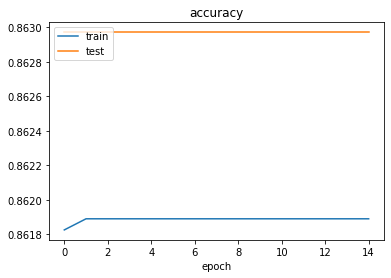

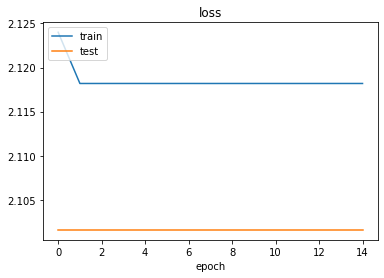

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)

# tempo de execução total
print(); print("Tempo de execução: %.5s segundos.\n" % (time.time() - start_time))

# plot dos gráficos
ntl.plot_accuracy(history)
ntl.plot_loss(history)